<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Classification - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


In [1]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

Read your chosen dataset into pandas dataframe:


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


The Titanic dataset is a widely used dataset in machine learning and data analysis, primarily for binary classification tasks such as predicting passenger survival based on various attributes. Here's a detailed breakdown of the data:

Dataset Overview
- Description: The Titanic dataset contains information about the passengers aboard the RMS Titanic, which sank on its maiden voyage in 1912 after hitting an iceberg.


Dataset Features:
- survived :	Survival status (0 = No, 1 = Yes)
- pclass :	Passenger class (1 = First, 2 = Second, 3 = Third)
- sex :	Gender of the passenger (male or female)
- age :	Age of the passenger (in years, may contain missing values)
- sibsp :	Number of siblings/spouses aboard
- parch :	Number of parents/children aboard
- fare :	Ticket fare
- embarked :	Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- class :	Passenger class (a string representation of pclass)
- who :	Classification of passenger (man, woman, or child)
- deck :	Deck where the passenger was located (many missing values)
- embark_town :	Port of embarkation as a full name (Cherbourg, Queenstown, Southampton)
- alive :	Survival status as a string (yes or no)
- alone :	Whether the passenger was traveling alone (True or False)


# 2. Objectives


- Predict whether a passenger survived based on their demographic and socio-economic information.

## Data Exploration

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic = titanic.dropna(subset=['embarked'])

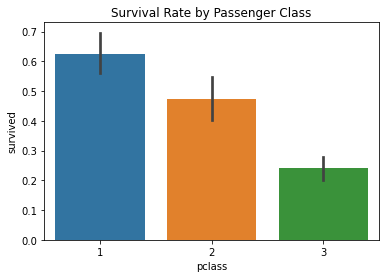

In [7]:
import matplotlib.pyplot as plt

sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.show()

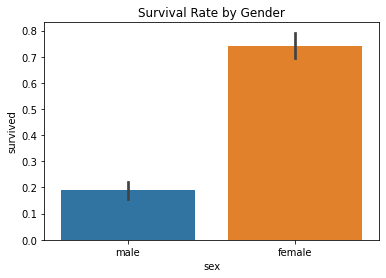

In [8]:
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.show()

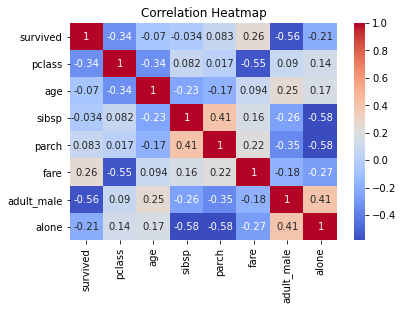

In [9]:
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

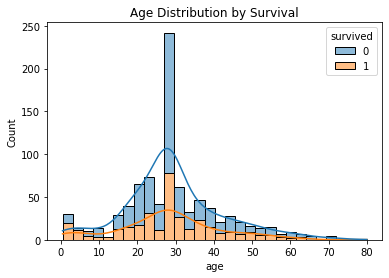

In [10]:
sns.histplot(titanic, x='age', hue='survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

# 3. Logistic Regression Models


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [12]:
titanic = titanic.drop(columns=['parch','embarked','embark_town', 'alive', 'adult_male', 'deck', 'alone'])
titanic = pd.get_dummies(titanic, columns=['sex', 'class', 'who'], drop_first=True)

In [13]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

In [14]:
scaler = StandardScaler()
X[['age', 'fare']] = scaler.fit_transform(X[['age', 'fare']])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = logreg.predict(X_test)

In [19]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8258426966292135

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.81      0.71      0.76        68

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.83      0.82       178


Confusion Matrix:
 [[99 11]
 [20 48]]


# KNN Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

In [23]:
scaler = StandardScaler()
X[['age', 'fare']] = scaler.fit_transform(X[['age', 'fare']])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn.predict(X_test)

In [27]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8033707865168539

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        68

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178


Confusion Matrix:
 [[94 16]
 [19 49]]


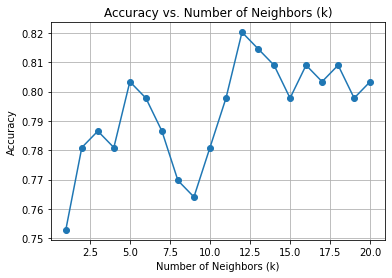

In [28]:
accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_scores.append(knn.score(X_test, y_test))

plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [29]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [30]:
y_pred = knn.predict(X_test)

In [31]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8202247191011236

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.69      0.75        68

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178


Confusion Matrix:
 [[99 11]
 [21 47]]


# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [33]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
y_pred = dt.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.7752808988764045

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       110
           1       0.70      0.72      0.71        68

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.78      0.78      0.78       178


Confusion Matrix:
 [[89 21]
 [19 49]]


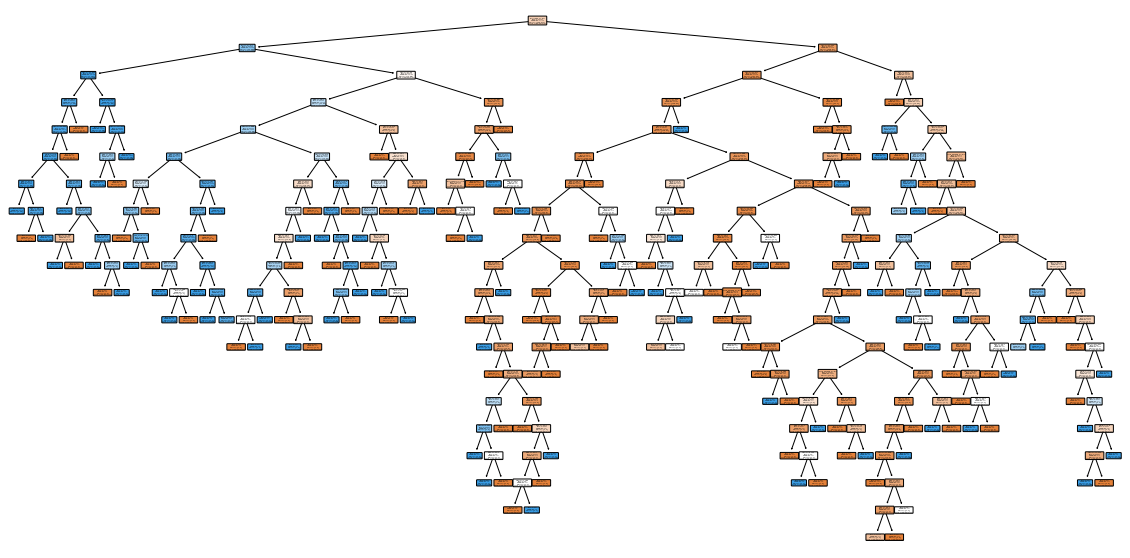

In [37]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = rf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8146067415730337

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.76      0.76        68

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.80       178
weighted avg       0.82      0.81      0.81       178


Confusion Matrix:
 [[93 17]
 [16 52]]


# Logistic & Grid Search

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [46]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
logreg = LogisticRegression(solver='liblinear')

In [49]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],                
    'penalty': ['l1', 'l2'],                
    'max_iter': [100, 200, 300],            
    'solver': ['liblinear']                 
}

In [50]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [51]:
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [52]:
best_logreg = grid_search.best_estimator_

In [54]:
y_pred = best_logreg.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8314606741573034

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.71      0.76        68

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178


Confusion Matrix:
 [[100  10]
 [ 20  48]]


# 4. Insights and key findings


In [55]:
model_scores = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression + Grid Search'],
    'Accuracy Score': [0.83, 0.82, 0.78, 0.81, 0.83]
}

In [56]:
df_scores = pd.DataFrame(model_scores)
print(df_scores)

                               Model  Accuracy Score
0                Logistic Regression            0.83
1                                KNN            0.82
2                      Decision Tree            0.78
3                      Random Forest            0.81
4  Logistic Regression + Grid Search            0.83


Key Findings:

1. Logistic Regression and Logistic Regression with Grid Search:

- Both models achieved the highest accuracy score of 0.83. This suggests that the standard Logistic Regression model and the tuned model (Logistic Regression with Grid Search) perform similarly in terms of classification accuracy.
- The lack of improvement after tuning with GridSearchCV might indicate that the dataset is relatively simple, and Logistic Regression is already well-optimized for this task.

2. K-Nearest Neighbors (KNN):

- KNN achieved an accuracy of 0.82, which is very close to Logistic Regression. This shows that KNN is performing nearly as well as Logistic Regression but slightly underperforms by a small margin (0.01).
- KNN’s performance can sometimes be sensitive to the choice of the number of neighbors, and further hyperparameter tuning (e.g., optimizing the number of neighbors) could potentially improve its accuracy.

3. Decision Tree:

- The Decision Tree model has the lowest accuracy of 0.78 among all the models. This suggests that, in this case, the Decision Tree is overfitting or underfitting the data, or its simplicity is not capturing complex relationships effectively.
- Decision Trees are prone to overfitting if they grow too deep, which might explain the lower accuracy if the tree is too large or lacks proper pruning.


4. Random Forest:

- Random Forest has an accuracy of 0.81, which is slightly lower than Logistic Regression and KNN.
Random Forest, being an ensemble of decision trees, tends to perform well, but it may be sensitive to hyperparameter choices, such as the number of trees or depth of trees.
- Further tuning, such as adjusting the number of trees or maximum depth, could help increase the accuracy.

Insights:

- Logistic Regression and KNN: These models are the best performers in terms of accuracy. Both are simple, effective algorithms that work well with this dataset, especially when the relationships between features and the target variable are linear or not overly complex.

- Decision Tree's performance suggests that while it is a flexible model, it might need further tuning (e.g., setting a maximum depth or using pruning techniques) to prevent overfitting or underfitting, as indicated by its lower accuracy.

- Random Forest is performing reasonably well, but with a bit lower accuracy than Logistic Regression and KNN, likely due to its complexity. However, its ensemble nature means that it could be more robust in handling various types of data, and fine-tuning might yield better results.

Conclusion:

- Logistic Regression and KNN appear to be the most reliable models for this dataset, with Logistic Regression slightly leading in terms of accuracy.
- If more interpretability or simplicity is needed, Logistic Regression might be preferable.
- Decision Tree and Random Forest are strong contenders in more complex datasets or with more hyperparameter tuning, but they did not perform as well in this case without further refinement.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
